# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Implementation/AutoML/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Implementation/AutoML/test.csv')

In [ ]:
# Show top 5 data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Show last 5 data
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Check data basic information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Summary statistics of a DataFrame
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing

In [ ]:
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [ ]:
age_mean = train['Age'].mean()
fare_mean = train['Fare'].mean()

train['Age'].fillna(age_mean, inplace=True)
train['Fare'].fillna(age_mean, inplace=True)

test['Age'].fillna(age_mean, inplace=True)
test['Fare'].fillna(age_mean, inplace=True)

train = train.dropna()
test = test.dropna()

print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

train = pd.DataFrame(train)
test = pd.DataFrame(test)

for col in ['Sex', 'Embarked']:
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])

for col in ['Sex', 'Embarked']:
  le = LabelEncoder()
  test[col] = le.fit_transform(test[col])

train_df = train
test_df = test

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.740385
1,1,0.188908


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.343234
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.341716
5,5,0.200000
4,4,0.000000
6,6,0.000000


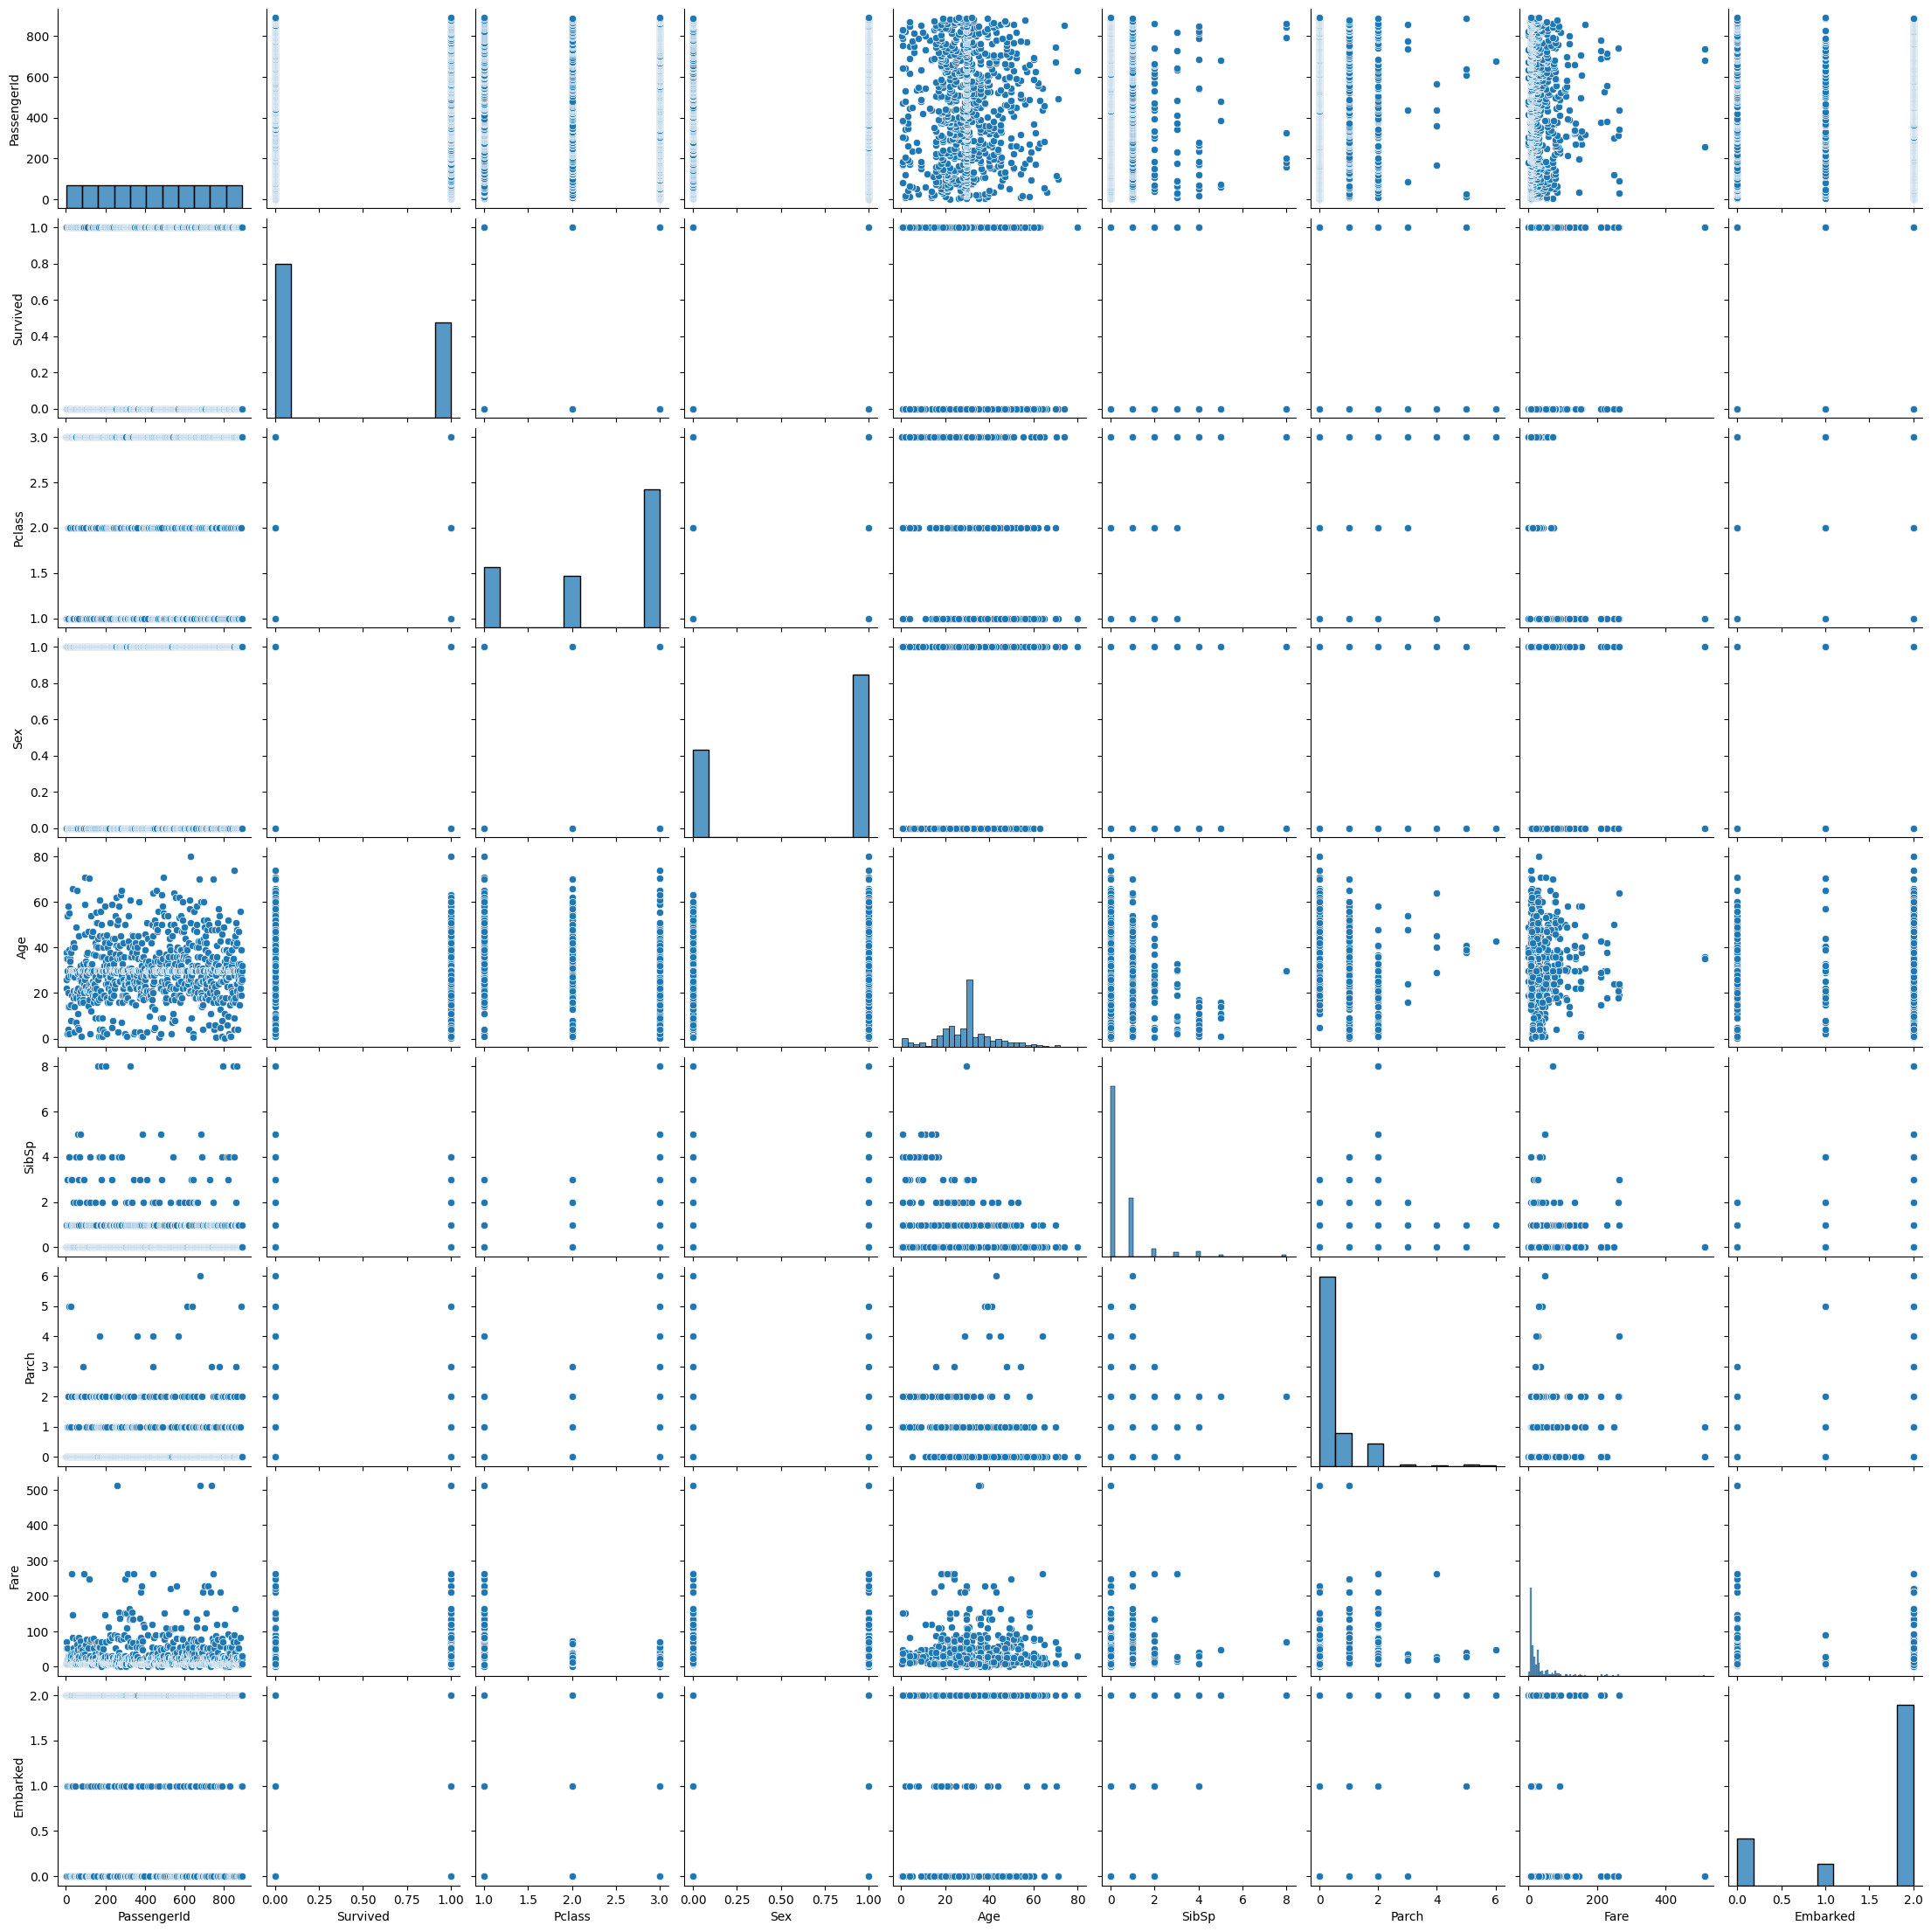

In [ ]:
# Generate a pairwise plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(train_df)
plt.show()

<Axes: >

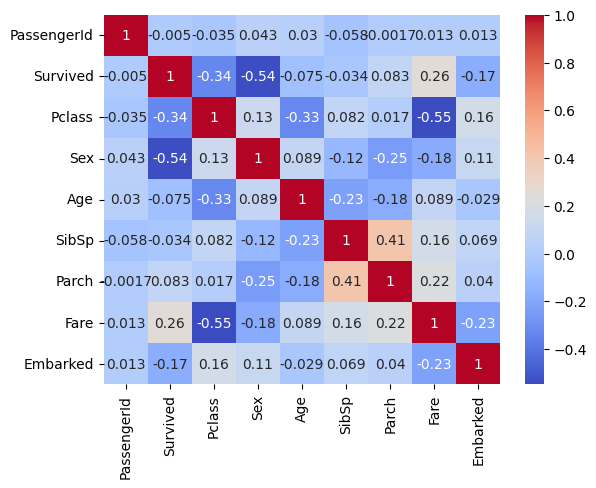

In [ ]:
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [ ]:
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# Stacking
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lr = LogisticRegression(fit_intercept=True, max_iter=1000)
svm = SVC()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.5, max_depth=3)

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

pred1 = lr.predict(X_test)
pred2 = svm.predict(X_test)
pred3 = rf.predict(X_test)
pred4 = xgb.predict(X_test)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingClassifier

cv = KFold(n_splits=5, random_state=42, shuffle=True)
estimators = [('rf', rf), ('svm', svm), ('xgb', xgb)]
final_estimator = LogisticRegression(fit_intercept=True, max_iter=1000)
model = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=cv)

model.fit(X_train, y_train)
pred_stacked = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8033707865168539

# Submission

In [ ]:
pred = model.predict(test_df)
predd = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": pred})
predd.to_csv('/content/drive/MyDrive/Implementation/AutoML/Survived_predition.csv', index=False, header=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


# AutoML

In [ ]:
! pip install requests
! pip install tabulate
! pip install future
! pip install h2o

In [ ]:
# Initialize h2o
import h2o 
h2o.init() 

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp57r3yn58
  JVM stdout: /tmp/tmp57r3yn58/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp57r3yn58/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,21 hours and 44 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_lan5fy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Import Data and Preprocessing

In [ ]:
# Convert to h20 frame
train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)
train_h2o

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,1,22,1,0,7.25,2
2,1,1,0,38,1,0,71.2833,0
3,1,3,0,26,0,0,7.925,2
4,1,1,0,35,1,0,53.1,2
5,0,3,1,35,0,0,8.05,2
6,0,3,1,29.6991,0,0,8.4583,1
7,0,1,1,54,0,0,51.8625,2
8,0,3,1,2,3,1,21.075,2
9,1,3,0,27,0,2,11.1333,2
10,1,2,0,14,1,0,30.0708,0


In [ ]:
train_h2o["Survived"] = train_h2o["Survived"].asfactor()

In [ ]:
# Split the dataset into training set and test set
split = train_h2o.split_frame(ratios = [0.8], seed = 42)

titanic_train = split[0]
titanic_test = split[1]

print("Training Set: ", titanic_train.shape)
print("Test Set: ", titanic_test.shape)

Training Set:  (702, 9)
Test Set:  (187, 9)


## Train

In [ ]:
# Train Model
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models=10, max_runtime_secs = 200, seed=1, sort_metric='logloss')
aml.train(y = 'Survived', training_frame = titanic_train, validation_frame = titanic_test)

AutoML progress: |
10:17:06.365: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),0/3
# GLM base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


## Leaderboard

In [ ]:
lb = aml.leaderboard
print(lb)

model_id                                                   logloss       auc     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20230429_101706      0.429013  0.863015  0.839538                0.195122  0.366649  0.134432
StackedEnsemble_BestOfFamily_1_AutoML_1_20230429_101706   0.430512  0.861791  0.839207                0.192327  0.367419  0.134997
GBM_4_AutoML_1_20230429_101706                            0.434783  0.854483  0.833527                0.196758  0.367332  0.134933
GBM_2_AutoML_1_20230429_101706                            0.440052  0.846234  0.834211                0.199343  0.370074  0.136955
GBM_3_AutoML_1_20230429_101706                            0.441813  0.849864  0.82605                 0.193641  0.371066  0.13769
GLM_1_AutoML_1_20230429_101706                            0.448422  0.850964  0.826264                0.207605  0.377846  0.142767
XGBoost_1_AutoML_1_20230429_101706                        0.459052  0.840477  0.8261

In [ ]:
## 顯示最佳模型資訊
print(aml.leader)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230429_101706


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  5/10
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  0/3
# GLM base models (used / total)      1/1
# DRF base models (used / total)      1/2
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.07458122759093742
RMSE: 0.27309563817633087
LogLoss: 0.26224299704646103
AUC: 0.968711740481674
AUCPR: 0.9568441278005593
Gini: 0.9374234809633479
Null degrees of freedom: 701
Residual degrees of f

In [ ]:
pred = aml.leader.predict(titanic_test)
binary_pred = pd.DataFrame(pred["predict"].as_data_frame()["predict"].tolist())
binary_pred

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


,0
0,1
1,1
2,1
3,1
4,1
...,...
182,1
183,0
184,1
185,0


## Predict Using Leader Model

In [ ]:
predict = aml.leader.predict(test_h2o)
predicts = predict['predict'].as_data_frame()
predicts

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


,predict
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


## Submission

In [ ]:
predd = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": predicts['predict']})
predd.to_csv('/content/drive/MyDrive/Implementation/AutoML/Survived_predition.csv', index=False, header=True)